# Gaussian Transport Test

Given two Gaussian distributions, we randomly sample points from the start distribution and the goal distribution and find the best matching pairs between the nodes

## Sampling

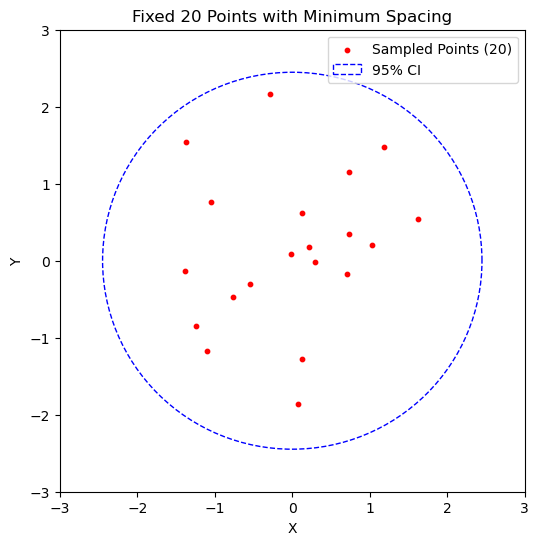

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

# Define Gaussian parameters
mean = [0, 0]  # Center of the Gaussian
cov = [[1, 0], [0, 1]]  # Isotropic Gaussian (Circular shape)

# Parameters
desired_samples = 20  # Fixed number of points to generate
num_candidates = 500 # Large candidate pool to ensure enough valid samples
min_spacing = 0.2  # Minimum allowed distance between points

# Generate candidate samples from 2D Gaussian
candidates = np.random.multivariate_normal(mean, cov, num_candidates)

# Compute 95% confidence interval boundary (Mahalanobis distance)
n_std = 2.4477  # Corresponds to 95% confidence
inv_cov = np.linalg.inv(cov)

# Function to check if a point is inside the confidence ellipse
def is_within_confidence_interval(point, mean, inv_cov, n_std):
    delta = point - mean
    mahalanobis_distance = np.sqrt(delta.T @ inv_cov @ delta)
    return mahalanobis_distance <= n_std

# Enforce spacing using KDTree while ensuring a fixed number of points
accepted_points = []
tree = KDTree([[0, 0]])

for point in candidates:
    if len(accepted_points) >= desired_samples:  # Stop when we reach the desired number
        break
    if is_within_confidence_interval(point, mean, inv_cov, n_std):
        if len(accepted_points) == 0 or tree.query(point)[0] > min_spacing:
            accepted_points.append(point)
            tree = KDTree(accepted_points)  # Update KDTree with new point

accepted_points = np.array(accepted_points)

# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(accepted_points[:, 0], accepted_points[:, 1], color="red", s=10, label=f"Sampled Points ({desired_samples})")

# Draw the 95% confidence interval ellipse
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(mean, cov, ax, n_std=2.4477, **kwargs):
    """Draws an ellipse representing the n_std confidence interval of a Gaussian."""
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    width, height = 2 * n_std * np.sqrt(eigvals)
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

ax = plt.gca()
confidence_ellipse(mean, cov, ax, edgecolor='blue', facecolor='none', linestyle='dashed', label='95% CI')

plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Fixed {desired_samples} Points with Minimum Spacing")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()


## One to One

## Split

## Merge